In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In this project, I'll use the Zomato API. Since Zomato allows us to get up to 100 restaurants with the maximum 20 restaurnts　per fetch, we will read several json files and combine them to one dataframe. All restaurants are in Chicago area.

In [2]:
df0 = pd.read_json("file0.json", lines=True)
df20 = pd.read_json("file20.json", lines=True)
df40 = pd.read_json("file40.json", lines=True)
df60 = pd.read_json("file60.json", lines=True)
df80 = pd.read_json("file80.json", lines=True)

In [3]:
#concat all the json files
frames = [df0, df20, df40, df60, df80]
df = pd.concat(frames, axis=0, ignore_index=True)

In [4]:
df.head()

results_found  results_start  results_shown  \
0          19474              0             20   
1          19474             20             20   
2          19474             40             20   
3          19474             60             20   
4          19474             80             20   

                                         restaurants  
0  [{'restaurant': {'R': {'has_menu_status': {'de...  
1  [{'restaurant': {'R': {'has_menu_status': {'de...  
2  [{'restaurant': {'R': {'has_menu_status': {'de...  
3  [{'restaurant': {'R': {'has_menu_status': {'de...  
4  [{'restaurant': {'R': {'has_menu_status': {'de...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
results_found    5 non-null int64
results_start    5 non-null int64
results_shown    5 non-null int64
restaurants      5 non-null object
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [6]:
df.restaurants[0]

[{'restaurant': {'R': {'has_menu_status': {'delivery': -1, 'takeaway': -1},
    'res_id': 16737455},
   'apikey': 'd9fd16b5f1a2bf1d8e26fab89b6c3388',
   'id': '16737455',
   'name': "Portillo's Hot Dogs",
   'url': 'https://www.zomato.com/chicago/portillos-hot-dogs-river-north?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
   'location': {'address': '100 West. Ontario 60610',
    'locality': 'River North',
    'city': 'Chicago',
    'city_id': 292,
    'latitude': '41.8934295000',
    'longitude': '-87.6314147000',
    'zipcode': '60610',
    'country_id': 216,
    'locality_verbose': 'River North, Chicago'},
   'switch_to_order_menu': 0,
   'cuisines': 'American, Italian, Burger, Sandwich',
   'timings': '10 AM to 1 AM (Mon-Sat), 10 AM to 12 Midnight (Sun)',
   'average_cost_for_two': 30,
   'price_range': 2,
   'currency': '$',
   'highlights': ['Serves Alcohol',
    'Cash',
    'Debit Card',
    'Takeaway Available',
    'Lunch',
    'Credit Card',
    'Dinner',
    'I

We only need "restaurants". We need to normalize the file.

In [7]:
restaurant_df=pd.DataFrame()

for i in range(5):
    restaurant_df =restaurant_df.append(json_normalize(df.restaurants[i]))

In [26]:
pd.set_option('display.max_columns', None)
restaurant_df.head(100)
restaurant_df.reset_index()

index  restaurant.R.has_menu_status.delivery  \
0       0                                     -1   
1       1                                     -1   
2       2                                     -1   
3       3                                     -1   
4       4                                     -1   
..    ...                                    ...   
95     15                                     -1   
96     16                                     -1   
97     17                                     -1   
98     18                                     -1   
99     19                                     -1   

    restaurant.R.has_menu_status.takeaway  restaurant.R.res_id  \
0                                      -1             16737455   
1                                      -1             16752778   
2                                      -1             16751896   
3                                      -1             16734669   
4                                      -1             16736014   
..                                    ...                  ...   
95                                     -1             16738600   
96                                     -1             16731812   
97                                     -1             16734872   
98                                     -1             16739175   
99                                     -1             16738171   

                   restaurant.apikey restaurant.id  \
0   d9fd16b5f1a2bf1d8e26fab89b6c3388      16737455   
1   d9fd16b5f1a2bf1d8e26fab89b6c3388      16752778   
2   d9fd16b5f1a2bf1d8e26fab89b6c3388      16751896   
3   d9fd16b5f1a2bf1d8e26fab89b6c3388      16734669   
4   d9fd16b5f1a2bf1d8e26fab89b6c3388      16736014   
..                               ...           ...   
95  d9fd16b5f1a2bf1d8e26fab89b6c3388      16738600   
96  d9fd16b5f1a2bf1d8e26fab89b6c3388      16731812   
97  d9fd16b5f1a2bf1d8e26fab89b6c3388      16734872   
98  d9fd16b5f1a2bf1d8e26fab89b6c3388      16739175   
99  d9fd16b5f1a2bf1d8e26fab89b6c3388      16738171   

                     restaurant.name  \
0                Portillo's Hot Dogs   
1                     The Purple Pig   
2                     Frontera Grill   
3                     Grand Lux Cafe   
4             Lou Malnati's Pizzeria   
..                               ...   
95                   Sultan's Market   
96                       312 Chicago   
97                   Heaven on Seven   
98  Twin Anchors Restaurant & Tavern   
99                       Smoke Daddy   

                                       restaurant.url  \
0   https://www.zomato.com/chicago/portillos-hot-d...   
1   https://www.zomato.com/chicago/the-purple-pig-...   
2   https://www.zomato.com/chicago/frontera-grill-...   
3   https://www.zomato.com/chicago/grand-lux-cafe-...   
4   https://www.zomato.com/chicago/lou-malnatis-pi...   
..                                                ...   
95  https://www.zomato.com/chicago/sultans-market-...   
96  https://www.zomato.com/chicago/312-chicago-loo...   
97  https://www.zomato.com/chicago/heaven-on-seven...   
98  https://www.zomato.com/chicago/twin-anchors-re...   
99  https://www.zomato.com/chicago/smoke-daddy-wic...   

                          restaurant.location.address  \
0                             100 West. Ontario 60610   
1                500 N Michigan Avenue, Chicago 60611   
2                        445 North Clark Street 60654   
3                         600 N Michigan Avenue 60611   
4                            439 N Wells Street 60654   
..                                                ...   
95          2057 West North Avenue, Wicker Park 60647   
96                    136 North La Salle Street 60602   
97  Garland Building, 111 N Wabash Avenue, 7th Flo...   
98         1655 North Sedgwick Street, Old Town 60614   
99                    1804 West Division Street 60622   

   restaurant.location.locality restaurant.location.city  \
0                   River 

Now we completed making a proper dataframe. Let's check what's inside.

In [27]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Data columns (total 56 columns):
restaurant.R.has_menu_status.delivery              100 non-null int64
restaurant.R.has_menu_status.takeaway              100 non-null int64
restaurant.R.res_id                                100 non-null int64
restaurant.apikey                                  100 non-null object
restaurant.id                                      100 non-null object
restaurant.name                                    100 non-null object
restaurant.url                                     100 non-null object
restaurant.location.address                        100 non-null object
restaurant.location.locality                       100 non-null object
restaurant.location.city                           100 non-null object
restaurant.location.city_id                        100 non-null int64
restaurant.location.latitude                       100 non-null object
restaurant.location.longitude                   

There is no null value. We will remove unnecessary columns such as photos, url, phone numbers.

In [42]:
new_df=restaurant_df.drop(columns=[
                                   "restaurant.apikey",
                                   "restaurant.url",
                                   "restaurant.is_zomato_book_res",
                                   "restaurant.book_form_web_view_url",
                                   "restaurant.R.res_id",
                                   "restaurant.location.city_id",
                                   "restaurant.location.city",
                                   "restaurant.photos_url", 
                                   "restaurant.photo_count",
                                   "restaurant.currency",
                                   "restaurant.photos",
                                   "restaurant.book_again_url",
                                   "restaurant.mezzo_provider",
                                   "restaurant.menu_url",
                                   "restaurant.events_url", 
                                   "restaurant.offers",
                                   "restaurant.opentable_support",
                                   "restaurant.phone_numbers",
                                   "restaurant.user_rating.rating_color",
                                   "restaurant.user_rating.rating_obj.bg_color.type",
                                   "restaurant.user_rating.rating_obj.bg_color.tint",
                                   "restaurant.deeplink",
                                   "restaurant.establishment_types",
                                   "restaurant.switch_to_order_menu",
                                   "restaurant.is_book_form_web_view",
                                   "restaurant.user_rating.rating_obj.title.text",
                                   "restaurant.featured_image",
                                   "restaurant.has_online_delivery",
                                   "restaurant.is_delivering_now",
                                   "restaurant.is_table_reservation_supported",
                                   "restaurant.is_delivering_now",
                                   "restaurant.thumb",
                                   "restaurant.store_type",
                                   "restaurant.has_table_booking",
                                   "restaurant.location.country_id",
                                   "restaurant.R.has_menu_status.takeaway",
                                   "restaurant.R.has_menu_status.delivery",
                                   "restaurant.include_bogo_offers",
                                   "restaurant.all_reviews.reviews"])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Data columns (total 18 columns):
restaurant.id                              100 non-null object
restaurant.name                            100 non-null object
restaurant.location.address                100 non-null object
restaurant.location.locality               100 non-null object
restaurant.location.latitude               100 non-null object
restaurant.location.longitude              100 non-null object
restaurant.location.zipcode                100 non-null object
restaurant.location.locality_verbose       100 non-null object
restaurant.cuisines                        100 non-null object
restaurant.timings                         100 non-null object
restaurant.average_cost_for_two            100 non-null int64
restaurant.price_range                     100 non-null int64
restaurant.highlights                      100 non-null object
restaurant.user_rating.aggregate_rating    100 non-null object
restaurant.user_

In [52]:
new_df.reset_index(drop=True, inplace=True)

In [53]:
new_df.head(100)

restaurant.id                   restaurant.name  \
0       16737455               Portillo's Hot Dogs   
1       16752778                    The Purple Pig   
2       16751896                    Frontera Grill   
3       16734669                    Grand Lux Cafe   
4       16736014            Lou Malnati's Pizzeria   
..           ...                               ...   
95      16738600                   Sultan's Market   
96      16731812                       312 Chicago   
97      16734872                   Heaven on Seven   
98      16739175  Twin Anchors Restaurant & Tavern   
99      16738171                       Smoke Daddy   

                          restaurant.location.address  \
0                             100 West. Ontario 60610   
1                500 N Michigan Avenue, Chicago 60611   
2                        445 North Clark Street 60654   
3                         600 N Michigan Avenue 60611   
4                            439 N Wells Street 60654   
..                                                ...   
95          2057 West North Avenue, Wicker Park 60647   
96                    136 North La Salle Street 60602   
97  Garland Building, 111 N Wabash Avenue, 7th Flo...   
98         1655 North Sedgwick Street, Old Town 60614   
99                    1804 West Division Street 60622   

   restaurant.location.locality restaurant.location.latitude  \
0                   River North                41.8934295000   
1              Magnificent Mile                41.8911277778   
2                   River North                41.8904333333   
3                   River North                41.8935805556   
4                   River North                41.8903810000   
..                          ...                          ...   
95                  Wicker Park                41.9103600000   
96                         Loop                41.8843175461   
97                         Loop                41.8835690000   
98                 Lincoln Park                41.9125200000   
99                  Wicker Park                41.9033500000   

   restaurant.location.longitude restaurant.location.zipcode  \
0                 -87.6314147000                       60610   
1                 -87.6248472222                       60611   
2                 -87.6311333333                       60654   
3                 -87.6251138889                       60611   
4                 -87.6340240000                       60654   
..                           ...                         ...   
95                -87.6790500000                       60647   
96                -87.6328124106                       60602   
97                -87.6260150000                       60602   
98                -87.6385400000                       60614   
99                -87.6725800000                       60622   

   restaurant.location.locality_verbose                  restaurant.cuisines  \
0                  River North, Chicago  American, Italian, Burger, Sandwich   
1             Magnificent Mile, Chicago                 Mediterranean, Tapas   
2                  River North, Chicago                              Mexican   
3                  River North, Chicago    American, Pizza, Burger, Sandwich   
4                  River North, Chicago                                Pizza   
..                                  ...                                  ...   
95                 Wicker Park, Chicago                       Middle Eastern   
96                        Loop, Chicago                              Italian   
97                        Loop, Chicago                      Cajun, Southern   
98                Lincoln Park, Chicago                        American, BBQ   
99                 Wicker Park, Chicago                        American, BBQ   

                                   restaurant.timings  \
0   10 AM to 1 AM (Mon-Sat), 10 AM to 12 Midnight ...   
1   11:30 AM to 12 Midnight (Mon, Tue, Wed, Thu, S...   

## Basic data analysis

Which area has the most restaurants in Chicago?

Text(0.5, 0, 'Number of restaurants')

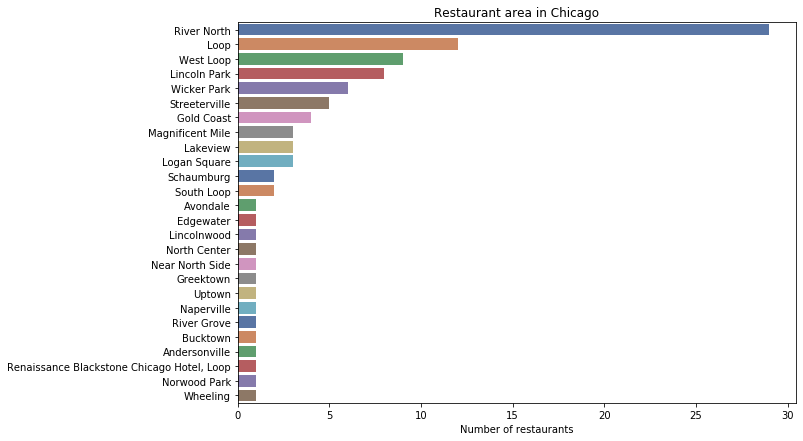

In [54]:
plt.figure(figsize=(10, 7))
areas=new_df["restaurant.location.locality"].value_counts()
sns.barplot(x=areas, y=areas.index, palette="deep")
plt.title("Restaurant area in Chicago")
plt.xlabel("Number of restaurants")

- As you can see River North has the most restaurants. Then Loop, West Loop and Lincoln Park follow.
- I'm living in Chicago and this data makes sense.

Next, let's check what kind of cuisine is popular in Chicago.

Text(0.5, 0, 'Number of restaurants')

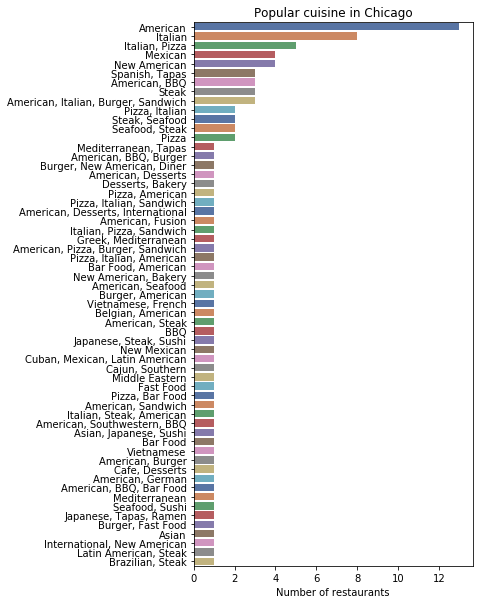

In [57]:
plt.figure(figsize=(5, 10))

cuisines=new_df["restaurant.cuisines"].value_counts()
sns.barplot(x=cuisines, y=cuisines.index, palette="deep")

plt.title("Popular cuisine in Chicago")
plt.xlabel("Number of restaurants")

As you can see, there are many overlap in the list. We need to clean up this.

In [61]:
new_df["restaurant.cuisines"] = new_df["restaurant.cuisines"].str.strip()
new_df["restaurant.cuisines"].value_counts()

American                               13
Italian                                 8
Italian, Pizza                          5
Mexican                                 4
New American                            4
Spanish, Tapas                          3
American, BBQ                           3
Steak                                   3
American, Italian, Burger, Sandwich     3
Pizza, Italian                          2
Steak, Seafood                          2
Seafood, Steak                          2
Pizza                                   2
Mediterranean, Tapas                    1
American, BBQ, Burger                   1
Burger, New American, Diner             1
American, Desserts                      1
Desserts, Bakery                        1
Pizza, American                         1
Pizza, Italian, Sandwich                1
American, Desserts, International       1
American, Fusion                        1
Italian, Pizza, Sandwich                1
Greek, Mediterranean              

In [85]:
import re

for i in range(new_df.index.size):
    if re.match('.*Burger.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Burger"
        
for i in range(new_df.index.size):
    if re.match('.*Fast Food.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Burger"
        
for i in range(new_df.index.size):
    if re.match('.*Japanese.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Japanese"
        
for i in range(new_df.index.size):
    if re.match('.*Sushi.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Japanese"
        
for i in range(new_df.index.size):
    if re.match('.*Pizza.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Pizza"
        
for i in range(new_df.index.size):
    if re.match('.*Mediterranean.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Mediterranean"
        
for i in range(new_df.index.size):
    if re.match('.*Spanish.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Mediterranean"

for i in range(new_df.index.size):
    if re.match('.*BBQ.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Steak"
        
for i in range(new_df.index.size):
    if re.match('.*Steak.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Steak"
        
for i in range(new_df.index.size):
    if re.match('.*Latin American.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Latin American"
        
for i in range(new_df.index.size):
    if re.match('.*Seafood.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Seafood"
        
for i in range(new_df.index.size):
    if re.match('.*Bar Food.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Bar Food"
        
for i in range(new_df.index.size):
    if re.match('.*Bakery.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Bakery"
        
for i in range(new_df.index.size):
    if re.match('.*Vietnamese.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Asian"
        
for i in range(new_df.index.size):
    if re.match('.*Italian.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Italian"
        
for i in range(new_df.index.size):
    if re.match('.*Desserts.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Desserts"
        
for i in range(new_df.index.size):
    if re.match('.*New Mexican.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Mexican"
        
for i in range(new_df.index.size):
    if re.match('.*Latin American.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Mexican"
        
for i in range(new_df.index.size):
    if re.match('.*American.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "American"
        
new_df["restaurant.cuisines"].value_counts()

American           22
Italian            14
Steak              11
Burger             10
Pizza               9
Mexican             7
Mediterranean       6
Seafood             5
Japanese            4
Asian               3
Desserts            3
Bar Food            2
Bakery              2
Cajun, Southern     1
Middle Eastern      1
Name: restaurant.cuisines, dtype: int64

Text(0.5, 0, 'Number of restaurants')

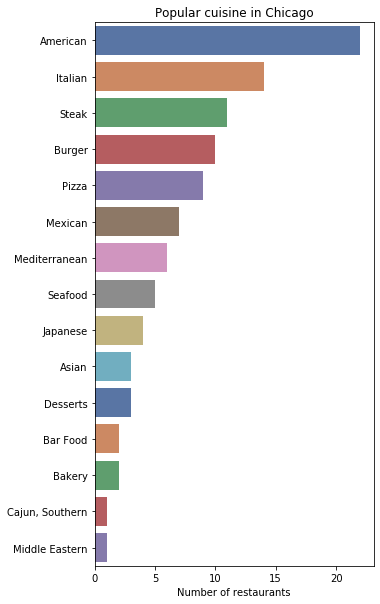

In [86]:
plt.figure(figsize=(5, 10))

cuisines=new_df["restaurant.cuisines"].value_counts()
sns.barplot(x=cuisines, y=cuisines.index, palette="deep")

plt.title("Popular cuisine in Chicago")
plt.xlabel("Number of restaurants")

As you can see,  American and Italian are popular cuisines in Chicago.

In [60]:
plt.figure(figsize=(5, 10))

establishment=new_df["restaurant.establishment"].value_counts()
establishment
# sns.barplot(x=establishment, y=establishment.index, palette="deep")

# plt.title("Popular cuisine in Chicago")
# plt.xlabel("Number of restaurants")

[Casual Dining]    66
[Fine Dining]      10
[Pizzeria]          6
[Bar]               5
[Fast Food]         4
[Diner]             4
[Bakery]            1
[Food Court]        1
[Microbrewery]      1
[Fast Casual]       1
[Café]              1
Name: restaurant.establishment, dtype: int64

<Figure size 360x720 with 0 Axes>

(array([ 2.,  1., 23., 13., 15., 14., 10.,  4.,  7.,  4.,  4.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.,
        132., 144., 156., 168., 180., 192., 204., 216., 228., 240., 252.,
        264., 276., 288., 300., 312., 324., 336., 348., 360., 372., 384.,
        396., 408., 420., 432., 444., 456., 468., 480., 492., 504., 516.,
        528., 540., 552., 564., 576., 588., 600.]),
 <a list of 50 Patch objects>)

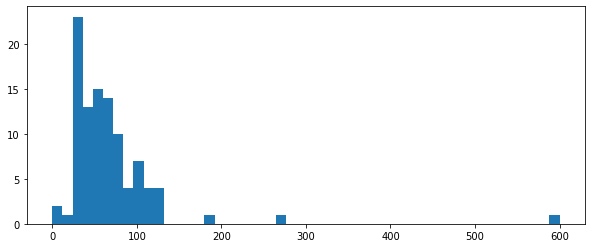

In [15]:
plt.figure(figsize=(10, 4))
costs=new_df["restaurant.average_cost_for_two"]
plt.hist(costs, bins=50)

(array([ 3.,  0.,  0., 30.,  0.,  0., 35.,  0.,  0., 32.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

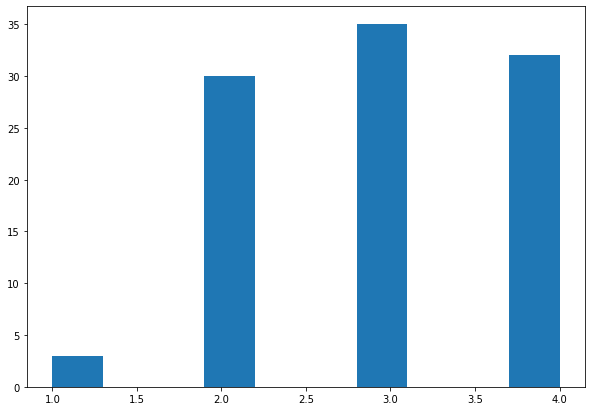

In [16]:
plt.figure(figsize=(10, 7))
costs=new_df["restaurant.price_range"]
plt.hist(costs)

(array([ 9., 15.,  6., 18.,  9.,  9., 11., 11.,  8.,  4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

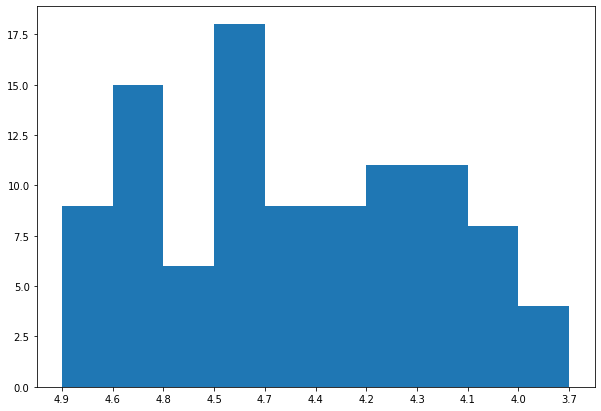

In [17]:
plt.figure(figsize=(10, 7))
ratings=new_df["restaurant.user_rating.aggregate_rating"]
plt.hist(ratings)

In [18]:
# Since our dataset dosen't have enough data, let's make the aggregate_rating binary >4.7 = 0, 4.7 =< = 1 